In [1]:
#python 2 and 3 comptibility
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import json
import io
import gzip
import base64
from astropy.io import fits
import matplotlib.pylab as plt
import pickle as pkl
import numpy as np
%matplotlib inline

data_path = '/home/ereyes/Alerce/ZTF_7_18'

#with open('/home/asceta/LRPpaper/datasets/ZTF/reals.pkl', 'rb') as f:
#    reals = pkl.load(f)
#with open('/home/asceta/LRPpaper/datasets/ZTF/bogus.pkl', 'rb') as f:
#    bogus = pkl.load(f)
    
#print('Number of reals: %d' %len(reals))
#print('Number of bogus: %d' %len(bogus))

In [2]:
def json2list(path):
    #load json
    with open(path, "r") as f:
        dataset = json.load(f)
    
    samples_list = []
    for i in range(len(dataset['query_result'])):

        channels = []
        for k, imstr in enumerate(['Template', 'Science', 'Difference']):
            stamp = dataset['query_result'][i]['cutout'+imstr]['stampData']
            stamp = base64.b64decode(stamp["$binary"].encode())

            with gzip.open(io.BytesIO(stamp), 'rb') as f:
                with fits.open(io.BytesIO(f.read())) as hdul:
                    img = hdul[0].data
                    channels.append(img)
        samples_list.append(np.array(channels))
    return samples_list

In [3]:
path = data_path+'/broker_reals.json'
with open(path, "r") as f:
        dataset = json.load(f)
        


In [4]:
type(dataset)
dataset.keys()

dict_keys(['query_result'])

In [5]:
len(dataset['query_result'])

7410

In [6]:
def createCircularMask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

In [75]:
n_alerts = {}
stamp_dict = {}
FWHM_dict = {}
all_fwhm = []
for alert in dataset["query_result"]:
    fwhm = alert["candidate"]["fwhm"]
    all_fwhm.append(fwhm)
    stamp = alert['cutoutDifference']['stampData']
    stamp = base64.b64decode(stamp["$binary"].encode())
    with gzip.open(io.BytesIO(stamp), 'rb') as f:
        with fits.open(io.BytesIO(f.read())) as hdul:
            img = hdul[0].data
    jd = alert["candidate"]["jd"]
    if fwhm in n_alerts.keys():
        n_alerts[fwhm] += 1
        stamp_dict[fwhm].append(img)
        FWHM_dict[fwhm].append(jd)
    else:
        n_alerts[fwhm] = 1
        stamp_dict[fwhm] = [img,]
        FWHM_dict[fwhm] = [jd,]

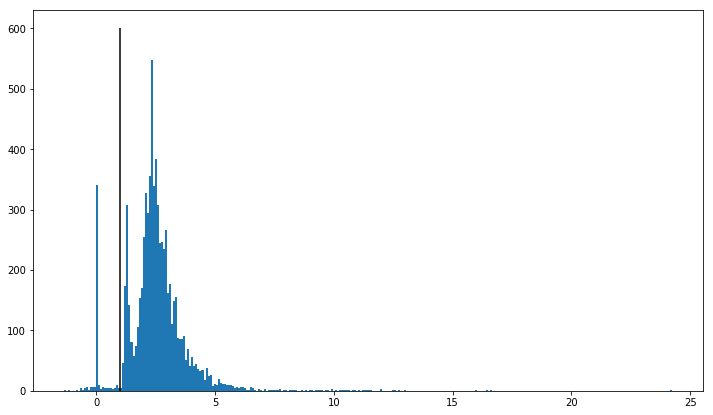

In [76]:
plt.figure(figsize=(12,7))
plt.hist(all_fwhm, bins=300)
plt.vlines(x=1, ymin=0, ymax=600)
plt.show()

(190, 21, 21)


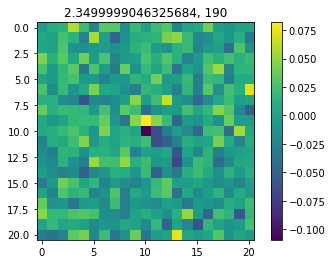

(19, 21, 21)


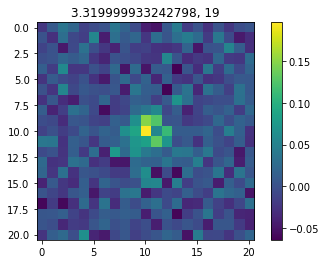

(38, 21, 21)


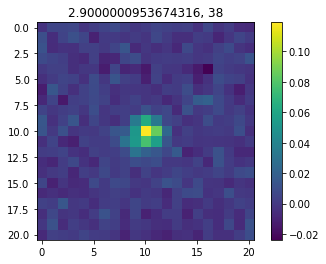

(41, 21, 21)


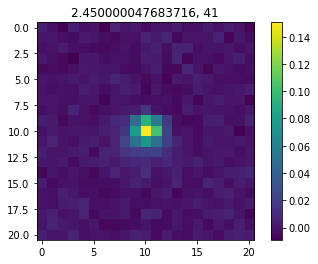

(11, 21, 21)


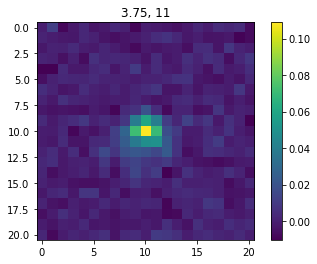

(18, 21, 21)


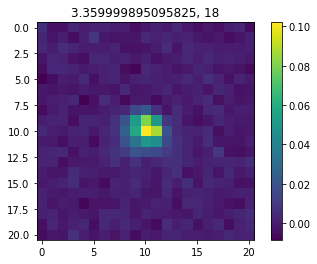

(27, 21, 21)


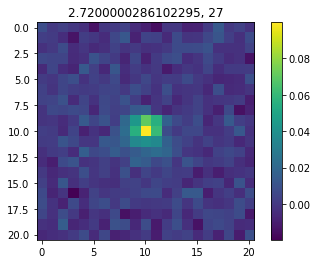

(21, 21, 21)


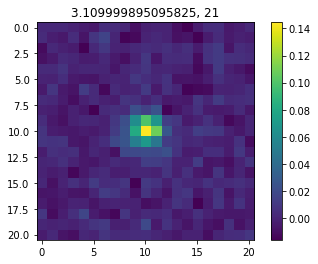

(22, 21, 21)


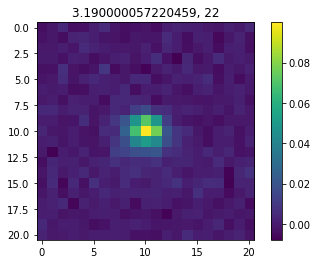

(15, 21, 21)


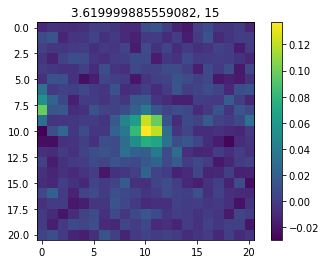

(36, 21, 21)


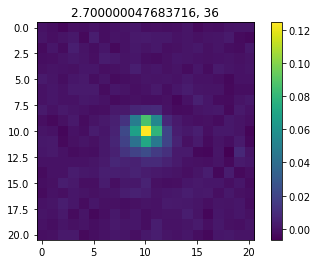

(100, 21, 21)


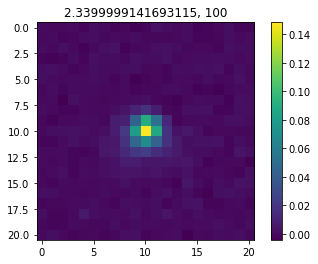

(44, 21, 21)


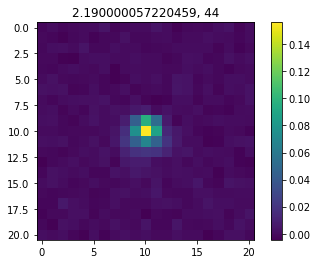

(29, 21, 21)


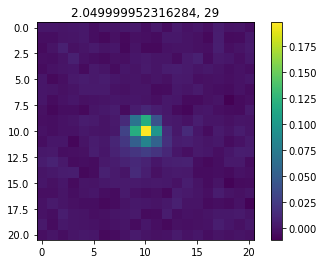

(40, 21, 21)


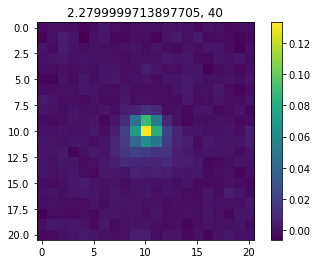

(37, 21, 21)


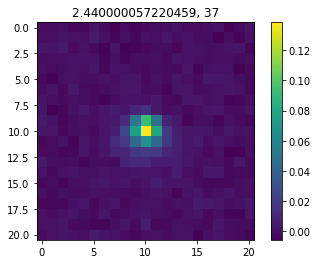

(17, 21, 21)


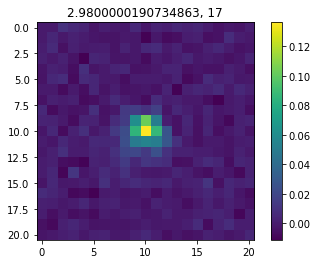

(36, 21, 21)


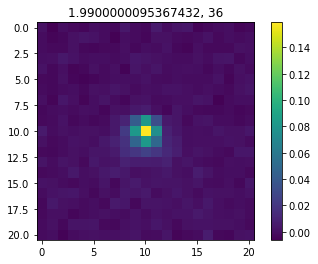

(46, 21, 21)


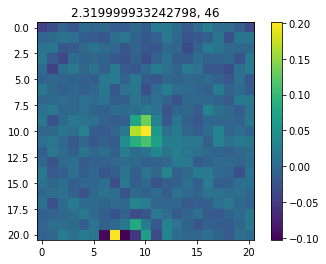

(39, 21, 21)


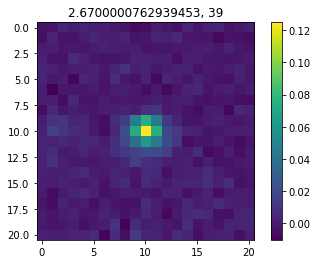

(71, 21, 21)


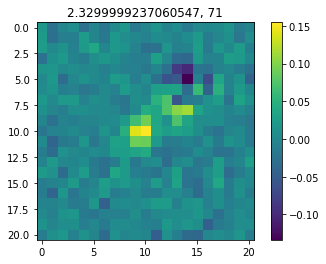

(43, 21, 21)


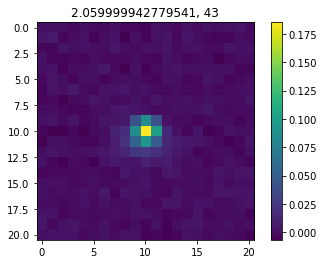

(36, 21, 21)


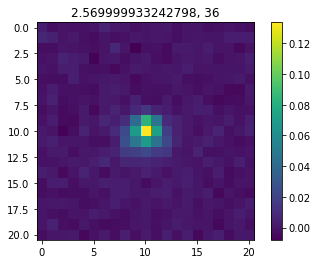

(38, 21, 21)


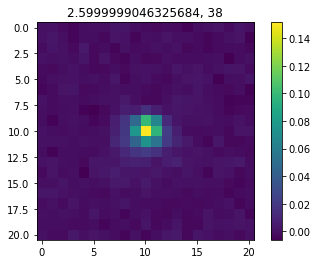

(68, 21, 21)


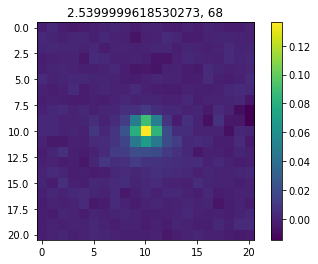

(12, 21, 21)


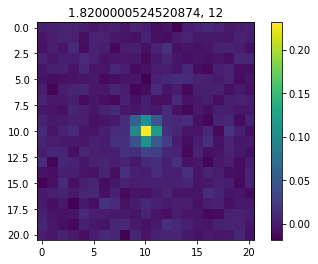

(37, 21, 21)


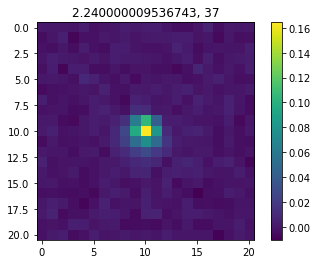

(21, 21, 21)


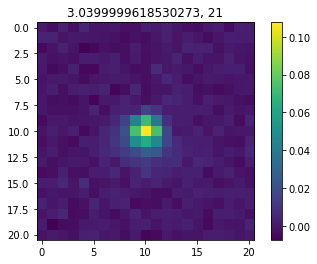

(48, 21, 21)


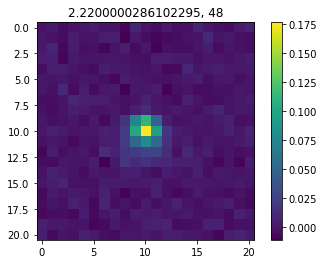

(14, 21, 21)


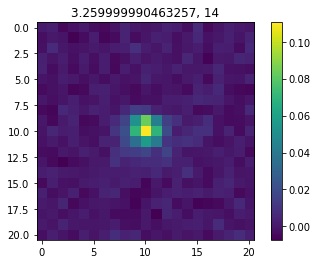

(30, 21, 21)


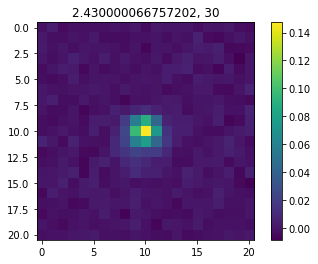

(26, 21, 21)


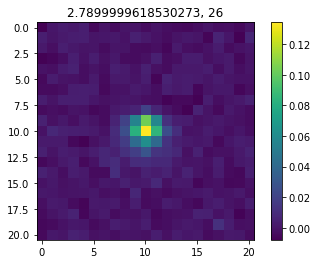

(19, 21, 21)


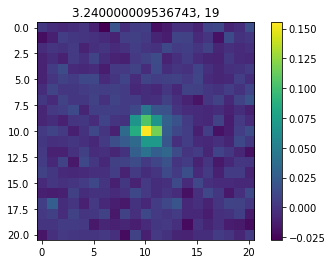

(30, 21, 21)


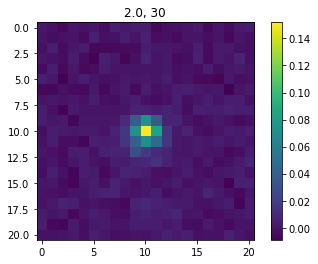

NameError: name 'asdasd' is not defined

In [77]:
estimated_psfs = []
for j, fw in enumerate(n_alerts.keys()):
    if fw>1 and fw<12 and n_alerts[fw] >= 10:
        for i, s in enumerate(stamp_dict[fw]):
            stamp_dict[fw][i] = np.nan_to_num(s)[21:42, 21:42]
            stamp_dict[fw][i] = stamp_dict[fw][i]/np.sum(stamp_dict[fw][i])
        stamp_dict[fw] = np.stack(stamp_dict[fw])
        print(stamp_dict[fw].shape)
        psf = np.mean(stamp_dict[fw], axis=0)
        plt.imshow(psf)
        plt.colorbar()
        plt.title(str(fw)+", "+str(n_alerts[fw]))
        plt.show()
    if j == 50:
        asdasd

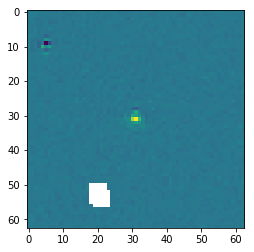

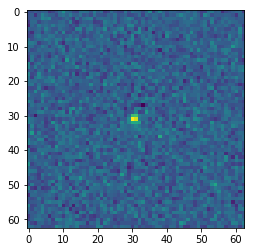

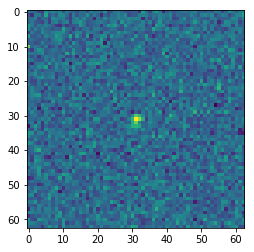

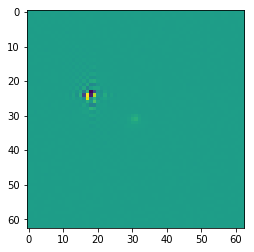

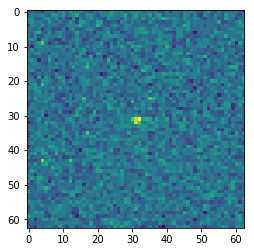

In [8]:
more_than_five = 0
for i, [seeing, counts] in enumerate(n_alerts.items()):
    if counts >= 5:
        for s in stamp_dict[jd]:
            plt.imshow(s)
            plt.show()
        if i == 10:
            break

In [9]:
dataset['query_result'][0]

{'_id': '460140646015010002_ZTF17aaaiikr',
 'objectId': 'ZTF17aaaiikr',
 'candid': 460140646015010002,
 'candidate': {'jd': 2458214.6406481,
  'fid': 2,
  'pid': 460140646015,
  'diffmaglim': 18.096073150634766,
  'pdiffimfilename': 'ztf_20180406140625_000565_zr_c16_o_q1_scimrefdiffimg.fits',
  'programpi': 'Kulkarni',
  'programid': 1,
  'candid': 460140646015010002,
  'isdiffpos': 'f',
  'tblid': 2,
  'nid': 460,
  'rcid': 60,
  'field': 565,
  'xpos': 1900.0875244140625,
  'ypos': 2474.431640625,
  'ra': 107.1357327,
  'dec': 21.977911,
  'magpsf': 17.494844436645508,
  'sigmapsf': 0.07626913487911224,
  'chipsf': 2.7487144470214844,
  'magap': 17.451900482177734,
  'sigmagap': 0.11599999666213989,
  'distnr': 0.07062359154224396,
  'magnr': 16.04400062561035,
  'sigmagnr': 0.017000000923871994,
  'chinr': 1.128999948501587,
  'sharpnr': -0.0560000017285347,
  'sky': -11.423020362854004,
  'magdiff': -0.04294378682971001,
  'fwhm': 2.3499999046325684,
  'classtar': 0.996999979019165

In [10]:
dataset['query_result'][0]["prv_candidates"]

[{'jd': 2458197.6968171,
  'fid': 2,
  'pid': 443196816015,
  'diffmaglim': 19.94300079345703,
  'pdiffimfilename': '/ztf/archive/sci/2018/0320/196794/ztf_20180320196794_000565_zr_c16_o_q1_scimrefdiffimg.fits.fz',
  'programpi': 'Kulkarni',
  'programid': 1,
  'candid': None,
  'isdiffpos': None,
  'tblid': None,
  'nid': None,
  'rcid': None,
  'field': None,
  'xpos': None,
  'ypos': None,
  'ra': None,
  'dec': None,
  'magpsf': None,
  'sigmapsf': None,
  'chipsf': None,
  'magap': None,
  'sigmagap': None,
  'distnr': None,
  'magnr': None,
  'sigmagnr': None,
  'chinr': None,
  'sharpnr': None,
  'sky': None,
  'magdiff': None,
  'fwhm': None,
  'classtar': None,
  'mindtoedge': None,
  'magfromlim': None,
  'seeratio': None,
  'aimage': None,
  'bimage': None,
  'aimagerat': None,
  'bimagerat': None,
  'elong': None,
  'nneg': None,
  'nbad': None,
  'rb': None,
  'ssdistnr': None,
  'ssmagnr': None,
  'ssnamenr': None,
  'sumrat': None,
  'magapbig': None,
  'sigmagapbig': Non

In [11]:
dataset['query_result'][0]['_id']

'460140646015010002_ZTF17aaaiikr'

In [12]:
stamp = dataset['query_result'][0]['cutout'+'Template']['stampData']
base64.b64decode(stamp["$binary"].encode())

b'\x1f\x8b\x08\x00L\xe9\xc6Z\x02\x03\xed\xbbe\x94\x96e\xdf\xb6\x0fH*\xdd\xa5"\xd20g_1\x1d\xdb\x00Cww\xa7t7\xd2\xdd\xd2\xdd \x8d\x80H\x87\xa4"\xd2%\x1d"]\xd2\xfcw\xee\xe7\xdb\x7f\xbd_\xde\xfbq\xbd\x9f\xbc\xd6b\r\xcc\x0c\xe7u\x1c\xbf\xd8\xf7m\x1f\xb1J\xa9r\x15\xcb\x16\xcf\x93\'2O\x9e\xaay\xfe\x81W\\\xa9\xaa\x15K\xd5\xfc\xcf\xf3\xfe\xff\xaf\x10\xd7\xf9\xbf\x7f^\xf9\xd8\x9a\xa5\xaa\xe4\xf9?>/O\x9e\xff\xf6y\xf6\xff\xf9y~\xf7\xbf|\x9e\xf3\xcf=/\xaeZ\xf9RU\xffs\xdf\x82\xf1\xe5\xff\xe7S\x05\xff7\xfd(^>>\xcf\xbf\xaf\x7f_\xff\xbe\xfe}\xfd\xfb\xfa\xf7\xf5\xef\xeb\xdf\xd7\xbf\xaf\x7f\xee\x85yc\x01\xe6\xe7\x83)v\xbc\x1eV\xbd\xca\xb8\x19l\xec\xb4\xa1\x98\xdd\x1ec\xefZ\x8e\x93n\x13V\xb2\xf6\x18\xfb_\xe9\xf3\xabpVV\xc4){\x00\xebxw\xac\\\x15\xb1\xdf\xd4\xc3\xfd\xab8^\x8f\xd48\xa6\x83\xdbx\x0e\xbe|\xd9p\xcfV\xc0\xbf:3aa\x85\x08T\xae\x84\xbf\xd0W\xf8\x9b\x1e\xc7?c4\xc15I\t\xae\xdaA\xf8\x9e\xe1\x84\x1fkN\xe8\xfa/\x88\xde1\x958+\x82\xb8\xe9\x95)\x99n1\xe5BvS\xf5B\x03j\xb5<K\xeb[[\xe9s\x7f$\xa3\xafT\xff\xb0

In [13]:
def check_samples_shapes(samples):
    miss_shaped_sample_idx = []
    for i in range(len(samples)):
        sample = samples[i]
        if sample.shape[0]!=3 or sample.shape[1]!=63 or sample.shape[2]!=63:
            #print("sample %i of shape %s" %(i,str(sample.shape)))
            miss_shaped_sample_idx.append(i)
    return miss_shaped_sample_idx

#misshaped_reals = check_samples_shapes(reals)
#misshaped_bogus = check_samples_shapes(bogus)
 
#print('Number of misshaped reals: %d' %len(misshaped_reals))
#print('Number of misshaped bogus: %d' %len(misshaped_bogus))

In [14]:
#TODO padding non trivial by determining center

def clean_misshaped(samples):
    miss_shaped_sample_idx = check_samples_shapes(samples)
    print('%d misshaped samples removed' %len(miss_shaped_sample_idx))
    for index in sorted(miss_shaped_sample_idx, reverse=True):
        samples.pop(index)
    return np.moveaxis(np.array(samples), 1, -1)

#reals_clean = clean_misshaped(reals)
#bogus_clean = clean_misshaped(bogus)

In [15]:
def crop_at_center(sample_numpy, cropsize=21):
    center = int((sample_numpy.shape[1]-1)/2)
    crop_side = int((cropsize-1)/2)
    crop_begin = center-crop_side
    crop_end = center+crop_side+1
    #print(center)
    #print(crop_begin, crop_end)
    return sample_numpy[:,crop_begin:crop_end,crop_begin:crop_end,:]

#reals_croped = crop_at_center(clean_misshaped(reals))
#bogus_croped = crop_at_center(clean_misshaped(bogus))

In [16]:
def zero_fill_nans(samples_numpy):
    samples_with_nan_idx = []
    for i in range(samples_numpy.shape[0]):
        if(np.isnan(samples_numpy[i,...]).any()):
            samples_with_nan_idx.append(i)
    print('%d samples with NaNs' %len(samples_with_nan_idx))
    return np.nan_to_num(samples_numpy)

#reals_croped_padded = zero_fill_nans(crop_at_center(clean_misshaped(reals)))
#bogus_croped_padded = zero_fill_nans(crop_at_center(clean_misshaped(bogus)))

In [17]:
#normalice each channel individually. Every channel of every sample will be 0-1 normalized
def normalize_01(samples_numpy):
    for i in range(samples_numpy.shape[0]):
        for j in range(samples_numpy.shape[3]):
            sample = samples_numpy[i,:,:,j]
            normalized_sample = (sample-np.min(sample))/np.max(sample-np.min(sample))
            samples_numpy[i,:,:,j] = normalized_sample
    return samples_numpy



In [18]:
def print_sample(img):
    fig = plt.figure()
    for k, imstr in enumerate(['Template', 'Science', 'Difference']):
        ax = fig.add_subplot(1,3,k+1)
        ax.axis('off')
        ax.set_title(imstr)
        ax.matshow(img[...,k])
        

# preprocessing

In [19]:
reals_croped_padded_norm = normalize_01(zero_fill_nans(crop_at_center(clean_misshaped(json2list(data_path+'/broker_reals.json')))))
bogus_croped_padded_norm = normalize_01(zero_fill_nans(crop_at_center(clean_misshaped(json2list(data_path+'/broker_bogus.json')))))

118 misshaped samples removed
263 samples with NaNs
29 misshaped samples removed
1482 samples with NaNs


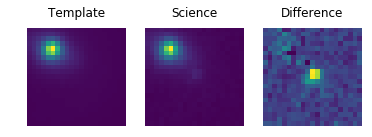

In [20]:
print_sample(reals_croped_padded_norm[1050,...])

In [21]:
np.max(reals_croped_padded_norm)

1.0

In [22]:
np.min(reals_croped_padded_norm)

0.0

# Save to pickle

In [23]:
with open('/home/asceta/LRPpaper/datasets/ZTF/reals_normed.pkl', 'wb') as f:
    pkl.dump(reals_croped_padded_norm, f)
with open('/home/asceta/LRPpaper/datasets/ZTF/bogus_normed.pkl', 'wb') as f:
    pkl.dump(bogus_croped_padded_norm, f)

FileNotFoundError: [Errno 2] No such file or directory: '/home/asceta/LRPpaper/datasets/ZTF/reals_normed.pkl'

# Data summary

In [ ]:
reals =json2list(data_path+'/broker_reals.json')
bogus =json2list(data_path+'/broker_bogus.json')

print('Number of reals: %d' %len(reals))
print('Number of bogus: %d' %len(bogus))

In [ ]:
print("Reals")
reals_croped_padded_norm = normalize_01(zero_fill_nans(crop_at_center(clean_misshaped(json2list(data_path+'/broker_reals.json')))))
print("\nBogus")
bogus_croped_padded_norm = normalize_01(zero_fill_nans(crop_at_center(clean_misshaped(json2list(data_path+'/broker_bogus.json')))))

In [ ]:
print('Number of reals after preprocessing: %d' % reals_croped_padded_norm.shape[0])
print('Number of bogus after preprocessing: %d' % bogus_croped_padded_norm.shape[0])